In [75]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [108]:

file_path = r"C:\Users\Zehra\Desktop\ML\data\breast-cancer-wisconsin.txt"
data = pd.read_csv(file_path, header=None)


In [36]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [37]:
col = ['ID', 'Lump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size'
       ,'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
data.columns=col


In [38]:
def value_count_each_value(cols_list):
    for col in cols_list:
        print(data[col].value_counts())


In [39]:
data

,ID,Lump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [40]:
value_count_each_value(data.columns)

ID
1182404    6
1276091    5
1198641    3
1158247    2
1070935    2
          ..
763235     1
776715     1
841769     1
888820     1
1016277    1
Name: count, Length: 645, dtype: int64
Lump_Thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19

In [41]:
data['Bare_Nuclei']=pd.to_numeric(data['Bare_Nuclei'], errors='coerce')

In [52]:
# using unique, I can find out where is null
data['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [56]:
# Finding class distribution
data['Class'].value_counts()/data.shape[0]*100

Class
2    65.522175
4    34.477825
Name: count, dtype: float64

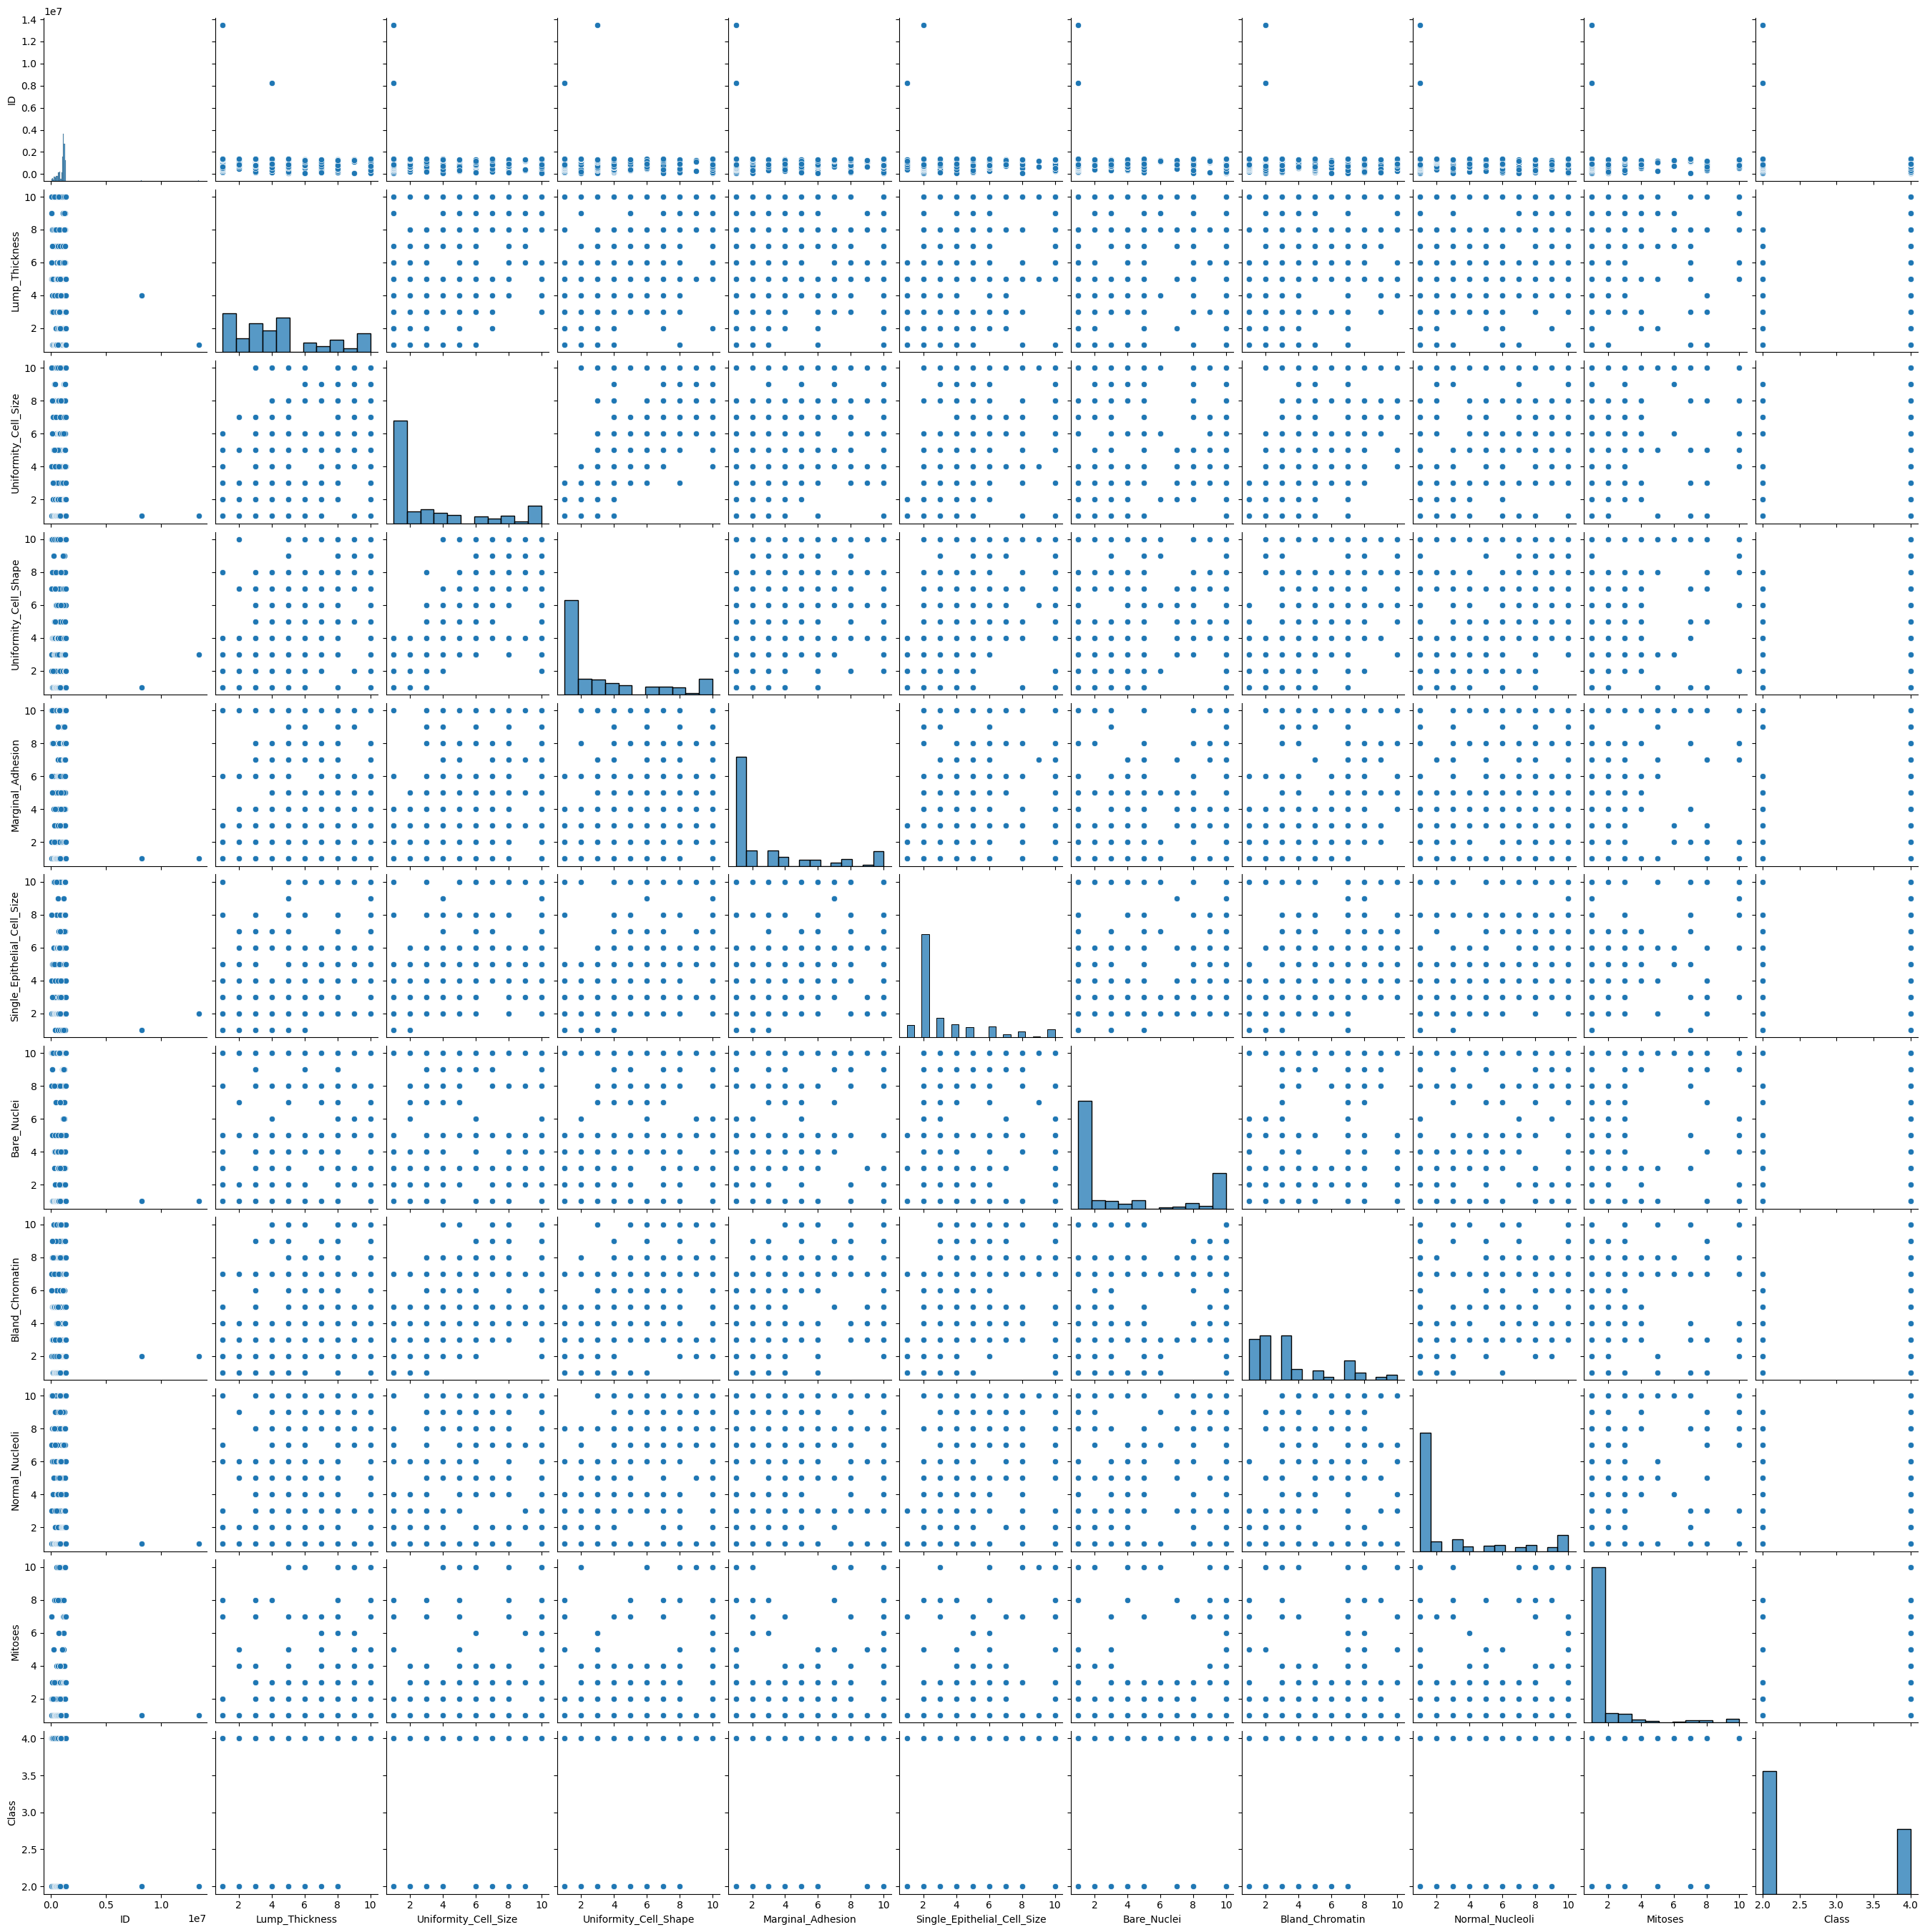

In [59]:
sns.pairplot(data=data)

In [67]:
data.describe()

,ID,Lump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [68]:
# dropping id because it is messing my scales
data.drop('ID', axis=1, inplace=True)

<Axes: >

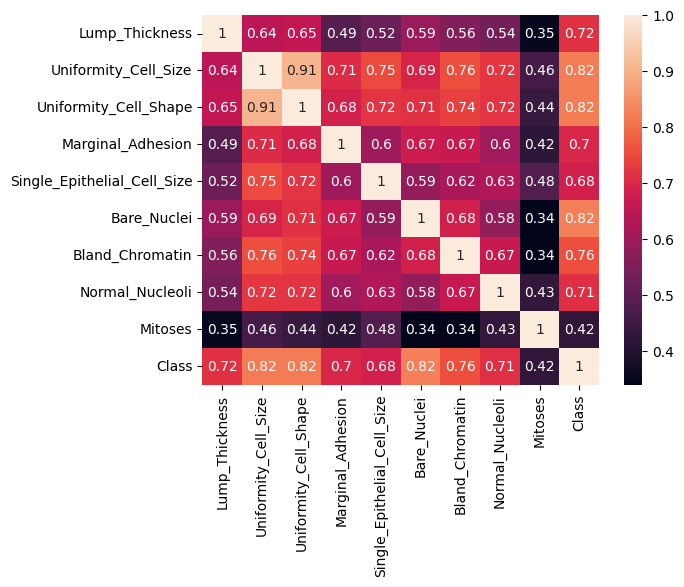

In [ ]:
sns.heatmap(data=data.corr(), annot=True)

In [85]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
X_train.shape, X_test.shape

((559, 9), (140, 9))

In [88]:
X_train['Bare_Nuclei']=X_train['Bare_Nuclei'].fillna(X_train['Bare_Nuclei'].median())
X_train.isnull().sum()

Lump_Thickness                 0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 293 to 684
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lump_Thickness               559 non-null    int64  
 1   Uniformity_Cell_Size         559 non-null    int64  
 2   Uniformity_Cell_Shape        559 non-null    int64  
 3   Marginal_Adhesion            559 non-null    int64  
 4   Single_Epithelial_Cell_Size  559 non-null    int64  
 5   Bare_Nuclei                  559 non-null    float64
 6   Bland_Chromatin              559 non-null    int64  
 7   Normal_Nucleoli              559 non-null    int64  
 8   Mitoses                      559 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 43.7 KB


In [90]:
X_test['Bare_Nuclei']=X_test['Bare_Nuclei'].fillna(X_test['Bare_Nuclei'].median())
X_test.isnull().sum()

Lump_Thickness                 0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [91]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 476 to 45
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lump_Thickness               140 non-null    int64  
 1   Uniformity_Cell_Size         140 non-null    int64  
 2   Uniformity_Cell_Shape        140 non-null    int64  
 3   Marginal_Adhesion            140 non-null    int64  
 4   Single_Epithelial_Cell_Size  140 non-null    int64  
 5   Bare_Nuclei                  140 non-null    float64
 6   Bland_Chromatin              140 non-null    int64  
 7   Normal_Nucleoli              140 non-null    int64  
 8   Mitoses                      140 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 10.9 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit + transform
X_train = scaler.fit_transform(X_train)


#  no fit to avoid overfitting
X_test = scaler.transform(X_test)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
y_pred = knn.predict(X_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

In [100]:
from sklearn.metrics import accuracy_score
print('Model accuracy = {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

Model accuracy = 97.8571


In [101]:
y_train_pred = knn.predict(X_train)

In [ ]:
print('Model Accuracy on Training data= {0:0.4}'.format(accuracy_score(y_train, y_train_pred)*100))

Model Accuracy on Training data= 98.21
